# Get model vertex experiment
Get information of trainning of the models saved in vertex experiment (get the model name, metrics, params and artifacts). This information will be showed in the app when the user want to see the information of trainning

---------

Source codes: 

folder: https://github.com/joseortegalabra/tracking-training-ml-models/tree/main/vertex_ai

specific notebook: https://github.com/joseortegalabra/tracking-training-ml-models/blob/main/vertex_ai/0_Vertex_AI_experiments_intro.ipynb

In [1]:
# ---------------------------- read env variables used in the app ----------------------------
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PROJECT_GCP = os.environ.get("PROJECT_GCP", "")
REGION_GCP = os.environ.get("REGION_GCP", "")
BUCKET_GCP = os.environ.get("BUCKET_GCP", "")

## RUN

In [2]:
import info_vertex_experiment as info_exp
from google.cloud import aiplatform as vertex_ai
import pandas as pd
import gcsfs
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### 1. Read parameters of the dataset
Dataset to do the EDA

In [3]:
# define name of the dataset - the user need to define it - ID - select by the user
NAME_DATASET = 'develop-app-final-v2'

### 3. Connect to vertex

#### 3.1 Define parameters of vertex experiment

In [4]:
# EXPERIMENT NAME GIVE BY THE USER
EXPERIMENT_NAME = NAME_DATASET # the name of the vertex experiment is the name of the dataset

EXPERIMENT_DESCRIPTION = f'Run forecasting models of a target. Dataset: {EXPERIMENT_NAME}'

#### 3.2 Set experiment vertex

In [5]:
# search tensorboard instance, if it doesn't exist -> created it
id_tensorboard_vertex = info_exp.get_tensorboard_instance_or_create(experiment_name = EXPERIMENT_NAME,
                                                                    experiment_description = EXPERIMENT_DESCRIPTION,
                                                                    project_gcp = PROJECT_GCP,
                                                                    location_gcp = REGION_GCP
                                                                   )

# set experiment (or created if it doesn't exist - automatically)
print('\n--- setting experiment vertex ai ---')
vertex_ai.init(
    experiment = EXPERIMENT_NAME,
    experiment_description = EXPERIMENT_DESCRIPTION,
    experiment_tensorboard = id_tensorboard_vertex,
    project = PROJECT_GCP,
    location = REGION_GCP,
    )

--- tensorboard instance already exists ---

--- setting experiment vertex ai ---


### 4. Show all the possibles runs to select to show information

#### 4.2 Show the names of each run that it is possible to show

OBSERVATION TO DO: see that the artifacts of vertex experiments are saved in GCS, so, if this part of the code is so slow, it is possible search the runs by the name of the folders in GCS

In [6]:
# get a list of all runs in the experiment
df_results_experiments = vertex_ai.get_experiment_df(EXPERIMENT_NAME) # it takes some seconds
list_runs = df_results_experiments['run_name'].tolist()

In [7]:
list_runs

['run-mlp-sk-test1',
 'run-rf-default-test1',
 'run-rf-medium-test1',
 'run-mlp-sk',
 'run-rf-default',
 'run-rf-small-test1',
 'run-rf-medium',
 'run-rf-small',
 'run-tree',
 'run-lr',
 'run-tree-test1',
 'run-lr-test1']

In [9]:
stop - select kind of run to show

SyntaxError: invalid syntax (164599208.py, line 1)

### 5. Show information of the selected RUN

In [10]:
# PARAMETER GIVEN BY THE USER - THE RUN TO FILTER THE INFORMATION
SELECTED_RUN = 'run-rf-medium'

In [11]:
params_trainning, params_problem, metrics_trainning, img_true_pred = info_exp.show_information_run(SELECTED_RUN, EXPERIMENT_NAME)

In [12]:
# show params context problem
params_problem

,steps_forecast
0,5.0


In [13]:
# show params models
params_trainning

,max_depth,random_state,min_samples_leaf,n_estimators,min_samples_split
0,50.0,42.0,10.0,30.0,10.0


In [14]:
# show metrics
metrics_trainning

,r2,mae,rmse
0,-1.049225,3.100339,3.693566


In [15]:
# show plot ytrue vs ypred

# get image
plt.imshow(img_true_pred)
plt.axis('off')

# get a python variable with plt figure
fig_ytrue_ypred = plt.gcf() # get actual plt figure
plt.close() # close plt

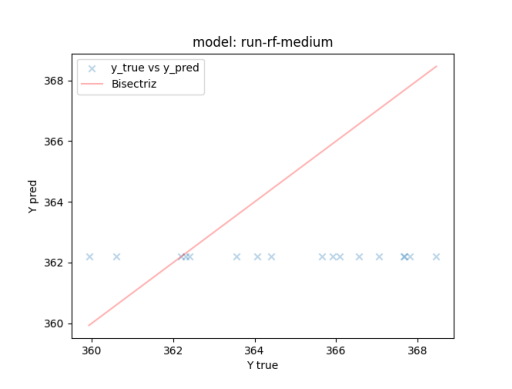

In [16]:
fig_ytrue_ypred

In [17]:
stop

NameError: name 'stop' is not defined

### 5B. Show information of the selected RUN - ANOTHER RUN

In [18]:
# PARAMETER GIVEN BY THE USER - THE RUN TO FILTER THE INFORMATION
SELECTED_RUN = 'run-lr'
params_trainning, params_problem, metrics_trainning, img_true_pred = info_exp.show_information_run(SELECTED_RUN, EXPERIMENT_NAME)

In [19]:
# show params context problem
params_problem

,steps_forecast
0,5.0


In [20]:
# show params models
params_trainning

""
0


In [21]:
# show metrics
metrics_trainning

,r2,mae,rmse
0,-46.144127,16.842967,17.715968


In [22]:
# show plot ytrue vs ypred

# get image
plt.imshow(img_true_pred)
plt.axis('off')

# get a python variable with plt figure
fig_ytrue_ypred = plt.gcf() # get actual plt figure
plt.close() # close plt

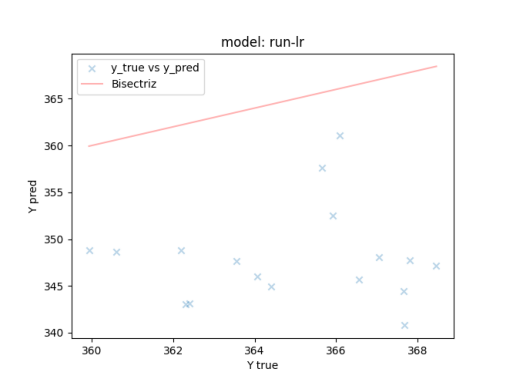

In [23]:
fig_ytrue_ypred